<a href="https://colab.research.google.com/github/TomAmster/Data-Science/blob/master/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Prep

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [0]:
drive_dir = '/content/drive/Shared drives/DS Workshop/data/'
train_path = drive_dir + 'train.csv'
train = pd.read_csv(train_path)
bids_path = drive_dir + 'bids.csv/bids.csv'
bids = pd.read_csv(bids_path)
test_path = drive_dir + 'test.csv'
test = pd.read_csv(test_path)

Joining train data with bid data so that we can use the "outcome" column

In [0]:
data = pd.merge(bids, train, on='bidder_id', how='left')

# **Time-Series Analysis**

## Bid Time Analysis

Let's do some exploration

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe75062b390>]],
      dtype=object)

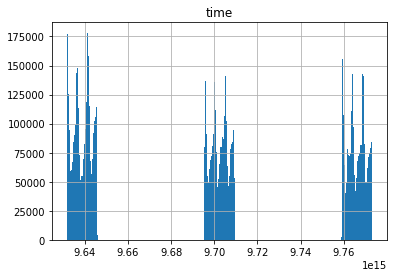

In [0]:
data.hist(column='time', bins=300)

In [0]:
# TODO: Yonatan, please insert here a histogram of 3 separate lines: humans, bots and total

Looks like 3 separate time periods. Let's expolore each individually.

In [0]:
period_1 = data[data.time < 9.66e15]
period_2 = data[data.time < 9.74e15][data.time > 9.66e15]
period_3 = data[data.time > 9.74e15]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Let's look at a histogram of the human bids vs the bot bids int the first period:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe7637ffa90>]],
      dtype=object)

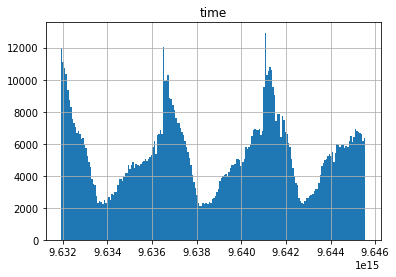

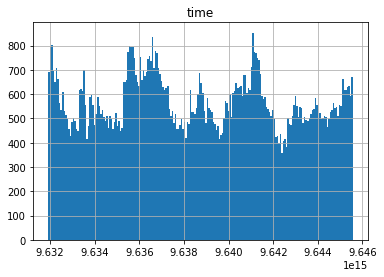

In [0]:
period_1_humans = period_1[period_1.outcome == 0]
period_1_bots = period_1[period_1.outcome == 1]
period_1_humans.hist(column='time', bins=200)
period_1_bots.hist(column='time', bins=200)

Interesting. Now let's look at period 2:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe765adbc88>]],
      dtype=object)

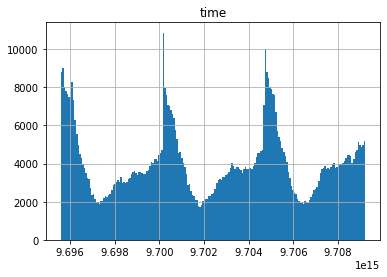

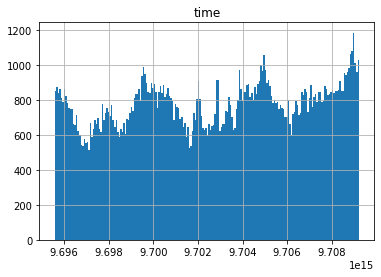

In [0]:
period_2_humans = period_2[period_2.outcome == 0]
period_2_bots = period_2[period_2.outcome == 1]
period_2_humans.hist(column='time', bins=200)
period_2_bots.hist(column='time', bins=200)

And period 3:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe76300cf98>]],
      dtype=object)

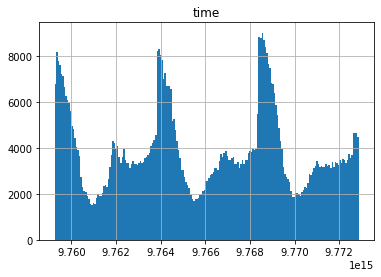

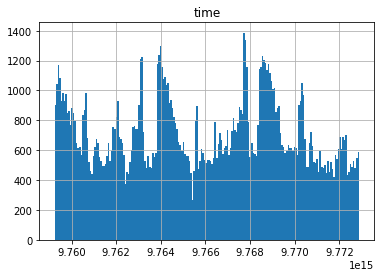

In [0]:
period_3_humans = period_3[period_3.outcome == 0]
period_3_bots = period_3[period_3.outcome == 1]
period_3_humans.hist(column='time', bins=200)
period_3_bots.hist(column='time', bins=200)

Conclusions:


1.   Human bid times are much more structured and periodical.
2.   Bot bid times are more sphoradic and noisy.
3.   Each of the 3 periods seems to have 3 distinct peaks in the human bids. We will conclude this is because each period represents 3 days, and the peaks correspond to some evening time, when people have more time to do online bidding.



## Time Stamp Processing

Following our conclusions from the previous sections, we've decided to assign synthetic timestamps to our data, in a way that preserves order and scale and would assign the human bids peaks to 7pm. We've placed the 3 periods a week apart from each other to avoid interference.

In [0]:
range_start_1 = 1543863600
range_end_1 = 1544122800
max_ts_1 = max(period_1.time)
min_ts_1 = min(period_1.time)
period_1.loc[:,'new_ts'] = range_start_1 + ((period_1.time - min_ts_1) / (max_ts_1 - min_ts_1)) * (range_end_1 - range_start_1)
period_1.loc[:,'new_ts'] = pd.to_datetime(period_1.new_ts, unit='s')
period_1.loc[:,'hour_of_day'] = period_1.new_ts.dt.hour

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Let's look at a histogram of the hours we've assigned to this period's data:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe763076940>]],
      dtype=object)

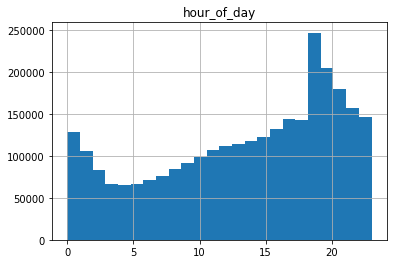

In [0]:
period_1.hist(column='hour_of_day', bins=24)

This looks good. Let's repeat for period 2:

In [0]:
range_start_2 = 1544468400
range_end_2 = 1544727600
max_ts_2 = max(period_2.time)
min_ts_2 = min(period_2.time)
period_2.loc[:,'new_ts'] = range_start_2 + ((period_2.time - min_ts_2) / (max_ts_2 - min_ts_2)) * (range_end_2 - range_start_2)
period_2.loc[:,'new_ts'] = pd.to_datetime(period_2.new_ts, unit='s')
period_2.loc[:,'hour_of_day'] = period_2.new_ts.dt.hour

Here's preoid 2's histogram:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe7640005f8>]],
      dtype=object)

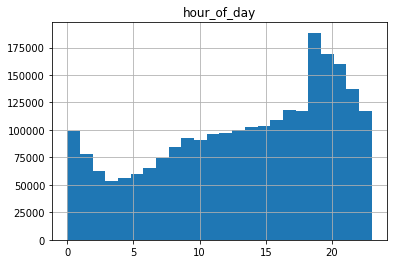

In [0]:
period_2.hist(column='hour_of_day', bins=24)

And period 3:

In [0]:
range_start_3 = 1545073200
range_end_3 = 1545332400
max_ts_3 = max(period_3.time)
min_ts_3 = min(period_3.time)
period_3.loc[:,'new_ts'] = range_start_3 + ((period_3.time - min_ts_3) / (max_ts_3 - min_ts_3)) * (range_end_3 - range_start_3)
period_3.loc[:,'new_ts'] = pd.to_datetime(period_3.new_ts, unit='s')
period_3.loc[:,'hour_of_day'] = period_3.new_ts.dt.hour

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [0]:
units_per_day = (max_ts_3 - min_ts_3) / 3
units_per_hour = units_per_day / 24
units_per_minute = units_per_hour / 60
units_per_second = units_per_minute / 60
print(f"Each second corresponds to {units_per_second} of original 'time' units")

Each second corresponds to 52631375.8934375 of original 'time' units


With it's histogram:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe764068518>]],
      dtype=object)

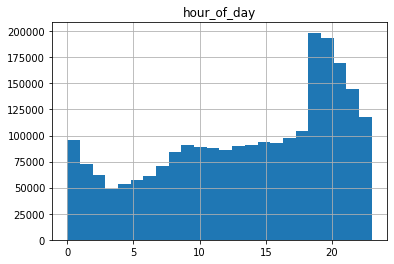

In [0]:
period_3.hist(column='hour_of_day', bins=24)

We have now successfully generated 2 features that will prove critical moving forward: "new_ts" and "hour_of_day". Many important features will rely on them.

## Time Based Feature Analsysis

Our time-based features will be using our generated new_ts and hour_of_day columns. The features that will be using these columns will quantify:


1.   Number and fraction (ratio) of bids in the first and last 10% of the auction.
2.   Time difference between bids per auction.
3.   Change times of ip, device, country.
4.   Ratio of bids in four 6-hour windows of hour_of_day.
5.   Bidding velocity - number of bids within rolling window of time.



In [0]:
new_data = pd.concat([period_1, period_2, period_3])

We will now save our new data to a new csv: (this step might take a while)

In [0]:
new_data.to_csv('/content/drive/Shared drives/DS Workshop/data/data_with_new_ts.csv')